In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

import numpy as np
from sklearn.cluster import KMeans

from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import normalize

from sklearn.cluster import DBSCAN
from sklearn import metrics

In [2]:
#import dataset
dataset_raw = pd.read_csv("./divar_dataset/divar_posts_dataset.csv")
dataset_raw.head()

# %store -r dataset_raw

In [3]:
dataset = dataset_raw[["cat1","cat2","cat3","price"]]
dataset = dataset.dropna()
dataset["product"] = dataset['cat2'] + "__" + dataset['cat3']
dataset = dataset[["product","price"]]
dataset

,product,price
0,furniture-and-home-decore__sofa-armchair,3850000
1,furniture-and-home-decore__antiques-and-art,30000
2,cars__heavy,-1
3,furniture-and-home-decore__sofa-armchair,600000
4,baby-and-toys__personal-toys,450000
...,...,...
947630,building-and-garden__stove-and-heating,180000
947631,audio-video__camera-camcoders,350000
947632,cars__light,17400000
947633,mobile-tablet__mobile-tablet-accessories,40000


In [4]:
dataset['price'] = dataset['price'].astype(int).round(-3)
dataset

,product,price
0,furniture-and-home-decore__sofa-armchair,3850000
1,furniture-and-home-decore__antiques-and-art,30000
2,cars__heavy,0
3,furniture-and-home-decore__sofa-armchair,600000
4,baby-and-toys__personal-toys,450000
...,...,...
947630,building-and-garden__stove-and-heating,180000
947631,audio-video__camera-camcoders,350000
947632,cars__light,17400000
947633,mobile-tablet__mobile-tablet-accessories,40000


In [5]:
grouped = dataset.groupby("product")
groups = []
for name, group in grouped:
#     print("\n"+name.upper()+"\n")
    groups.append(group)

In [6]:
combined_groups = groups[0]['price'].value_counts().add(groups[1]['price'].value_counts(),fill_value=0)
for i in range(2,len(groups)):
    combined_groups = combined_groups.add(groups[i]['price'].value_counts(),fill_value=0)

    
combined_groups = combined_groups.dropna()
combined_groups

0            127070.0
1000            545.0
2000            833.0
3000            525.0
4000            582.0
               ...   
378000000         1.0
380000000         2.0
390000000         1.0
398000000         1.0
400000000         1.0
Name: price, Length: 2200, dtype: float64

In [7]:

vectors = []
for name, group in grouped:
    series = group['price'].value_counts().reindex(combined_groups.keys())
#     series = group['price'].value_counts()[combined_groups.keys()]
    series.name = name
    vectors.append(series)

In [9]:
clean_data = pd.concat(vectors, axis=1).transpose()
clean_data = clean_data.drop(0, 1)
clean_data

,1000,2000,3000,4000,5000,6000,7000,8000,9000,10000,...,343000000,350000000,355000000,360000000,375000000,378000000,380000000,390000000,398000000,400000000
animals__accessories,6.0,13.0,10.0,10.0,30.0,14.0,16.0,25.0,3.0,98.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
animals__birds,12.0,15.0,12.0,9.0,28.0,8.0,45.0,85.0,23.0,441.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
animals__cat,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
animals__farm-animals,5.0,55.0,52.0,36.0,29.0,19.0,17.0,28.0,9.0,53.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
animals__fish,7.0,25.0,16.0,12.0,18.0,12.0,6.0,11.0,4.0,37.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
utensils-and-appliances__fridge-and-freezer,8.0,7.0,2.0,1.0,1.0,4.0,NaN,NaN,NaN,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
utensils-and-appliances__microwave-stove,4.0,1.0,NaN,NaN,1.0,2.0,NaN,NaN,NaN,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
utensils-and-appliances__washer-dryer,5.0,2.0,2.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
utility__instrument-cleaning-tailoring,6.0,3.0,2.0,1.0,5.0,1.0,1.0,5.0,NaN,41.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
clean_data_numpy = clean_data.fillna(0)

clean_data_numpy

,1000,2000,3000,4000,5000,6000,7000,8000,9000,10000,...,343000000,350000000,355000000,360000000,375000000,378000000,380000000,390000000,398000000,400000000
animals__accessories,6.0,13.0,10.0,10.0,30.0,14.0,16.0,25.0,3.0,98.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
animals__birds,12.0,15.0,12.0,9.0,28.0,8.0,45.0,85.0,23.0,441.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
animals__cat,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
animals__farm-animals,5.0,55.0,52.0,36.0,29.0,19.0,17.0,28.0,9.0,53.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
animals__fish,7.0,25.0,16.0,12.0,18.0,12.0,6.0,11.0,4.0,37.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
utensils-and-appliances__fridge-and-freezer,8.0,7.0,2.0,1.0,1.0,4.0,0.0,0.0,0.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
utensils-and-appliances__microwave-stove,4.0,1.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
utensils-and-appliances__washer-dryer,5.0,2.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
utility__instrument-cleaning-tailoring,6.0,3.0,2.0,1.0,5.0,1.0,1.0,5.0,0.0,41.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
clean_data_numpy = scaler.fit_transform(clean_data_numpy)
clean_data_numpy

array([[0.04724409, 0.11711712, 0.16949153, ..., 0.        , 0.        ,
        0.        ],
       [0.09448819, 0.13513514, 0.20338983, ..., 0.        , 0.        ,
        0.        ],
       [0.03149606, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.03937008, 0.01801802, 0.03389831, ..., 0.        , 0.        ,
        0.        ],
       [0.04724409, 0.02702703, 0.03389831, ..., 0.        , 0.        ,
        0.        ],
       [0.03937008, 0.        , 0.03389831, ..., 0.        , 0.        ,
        0.        ]])

In [12]:
def evaluate_model(model):
    try:
        silhouete = metrics.silhouette_score(clean_data_numpy, model.labels_, metric='euclidean')
        calinski = metrics.calinski_harabasz_score(clean_data_numpy, model.labels_)
        davies_bouldin_score = metrics.davies_bouldin_score(clean_data_numpy, model.labels_)
    except:
        return None
    return {"silhouete":silhouete, "calinski":calinski,"davies_bouldin_score":davies_bouldin_score}

def print_model_evaluations(model):
    evaluations = evaluate_model(model)
    print("\n"+type(model).__name__+":")
    
    print([(a,b) for a, b in sorted(zip(clean_data.index, model.labels_), key=lambda x: x[1])])
    if not evaluations:
        print(" Error")
        return
    for name , result in evaluations.items():
        print(f"{name} : {result}")


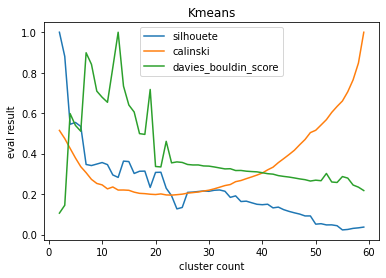

In [13]:
results = [[],[],[]]
cluser_counts = []
for cluster_number in range(2,60):
        
        kmeans = KMeans(n_clusters=cluster_number, random_state=0).fit(clean_data_numpy)
        evaluation = evaluate_model(kmeans)
        if evaluation:
            results[0].append(evaluation["silhouete"])
            results[1].append(evaluation["calinski"])
            results[2].append(evaluation["davies_bouldin_score"])
            cluser_counts.append(cluster_number)
        

results = [l / max(l) for l in results] # normalize result

# plotting the line 1 points 
plt.plot(cluser_counts,results[0], label = "silhouete")

# plotting the line 2 points 
plt.plot(cluser_counts, results[1], label = "calinski")

plt.plot(cluser_counts, results[2], label = "davies_bouldin_score")

plt.xlabel('cluster count')
# Set the y axis label of the current axis.
plt.ylabel('eval result')
# Set a title of the current axes.
plt.title('Kmeans')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

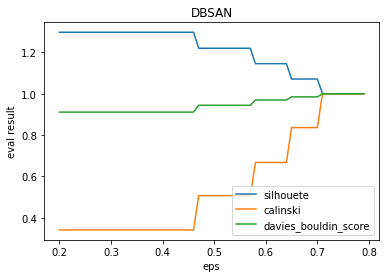

In [14]:
results = [[],[],[]]
eps_values = []
for eps in [x * 0.01 for x in range(1, 80)]:
        
    db = DBSCAN(eps=eps, min_samples=2,metric='euclidean').fit(clean_data_numpy)

    evaluation = evaluate_model(db)
    if evaluation:
        results[0].append(evaluation["silhouete"])
        results[1].append(evaluation["calinski"])
        results[2].append(evaluation["davies_bouldin_score"])
        eps_values.append(eps)
        

results = [l / max(l) for l in results] # normalize result

plt.plot(eps_values,results[0], label = "silhouete")

plt.plot(eps_values, results[1], label = "calinski")

plt.plot(eps_values, results[2], label = "davies_bouldin_score")

plt.xlabel('eps')
# Set the y axis label of the current axis.
plt.ylabel('eval result')
# Set a title of the current axes.
plt.title('DBSAN')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

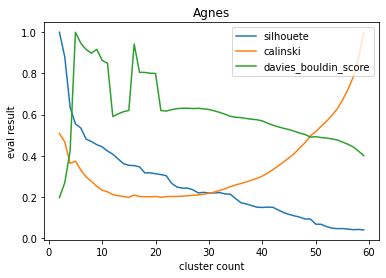

In [15]:
       
results = [[],[],[]]
cluser_counts = []
for cluster_number in range(2,60):
        
    agnes = AgglomerativeClustering(n_clusters=cluster_number,affinity='euclidean',linkage='average').fit(clean_data_numpy)
    evaluation = evaluate_model(agnes)
    if evaluation:
        results[0].append(evaluation["silhouete"])
        results[1].append(evaluation["calinski"])
        results[2].append(evaluation["davies_bouldin_score"])
        cluser_counts.append(cluster_number)
        

results = [l / max(l) for l in results] # normalize result

# plotting the line 1 points 
plt.plot(cluser_counts,results[0], label = "silhouete")

# plotting the line 2 points 
plt.plot(cluser_counts, results[1], label = "calinski")

plt.plot(cluser_counts, results[2], label = "davies_bouldin_score")

plt.xlabel('cluster count')
# Set the y axis label of the current axis.
plt.ylabel('eval result')
# Set a title of the current axes.
plt.title('Agnes')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

In [16]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(clean_data_numpy)

db = DBSCAN(eps=0.7, min_samples=2).fit(clean_data_numpy)
agnes = AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='average').fit(clean_data_numpy)

In [17]:
models = (agnes,kmeans , db)

for model in models:
    print_model_evaluations(model)


AgglomerativeClustering:
[('animals__accessories', 0), ('animals__birds', 0), ('animals__cat', 0), ('animals__farm-animals', 0), ('animals__fish', 0), ('animals__rodents-rabbits', 0), ('audio-video__camera-camcoders', 0), ('audio-video__mp3-player', 0), ('audio-video__stereo-surround', 0), ('audio-video__tv-projector', 0), ('audio-video__video-dvdplayer', 0), ('baby-and-toys__child-car-seat', 0), ('baby-and-toys__childrens-furniture', 0), ('baby-and-toys__personal-toys', 0), ('baby-and-toys__strollers-and-accessories', 0), ('book-student-literature__educational', 0), ('building-and-garden__bathroom-wc-sauna', 0), ('building-and-garden__garden-and-patio', 0), ('building-and-garden__kitchen', 0), ('building-and-garden__stove-and-heating', 0), ('cars__heavy', 0), ('computers__desktops', 0), ('computers__laptops', 0), ('computers__modem-and-network-equipment', 0), ('computers__parts-and-accessories', 0), ('computers__printer-scaner-copier', 0), ('equipments-and-machinery__barbershop-and-b